In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
df = pd.read_csv('flights.csv')
df = df.dropna()
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [7]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


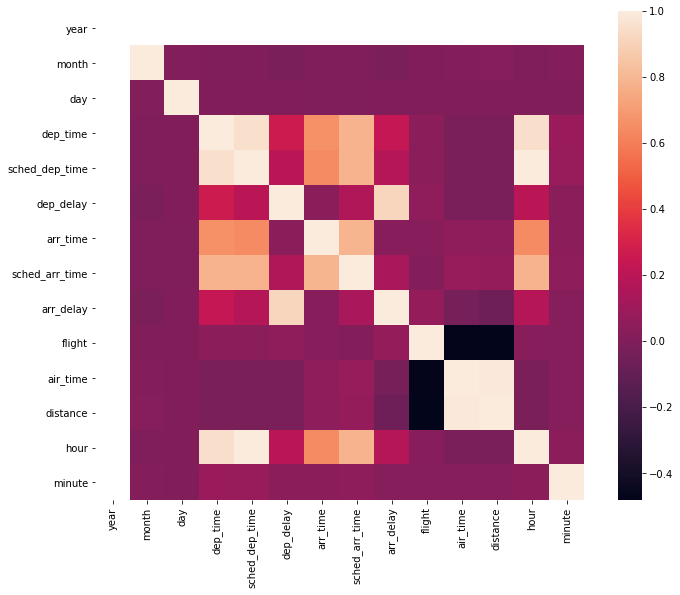

In [10]:
# Correlation matrix to show correlation between different attributes/columns
corr_matrix = df.corr()
corr_matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True);
plt.show()

In [47]:
# View of the total amount of flights with delayed arrivals per airline
delayed_arrivals = df[df['arr_delay'] > 0]
delayed_arrivals = delayed_arrivals.groupby('carrier')['arr_delay'].count().sort_values()
print(delayed_arrivals)

carrier
OO       10
HA       97
AS      189
YV      258
F9      392
VX     1746
FL     1895
WN     5304
9E     6637
US     7349
AA    10706
MQ    11693
DL    16413
UA    22222
B6    23609
EV    24484
Name: arr_delay, dtype: int64


<AxesSubplot:xlabel='carrier', ylabel='arr_delay'>

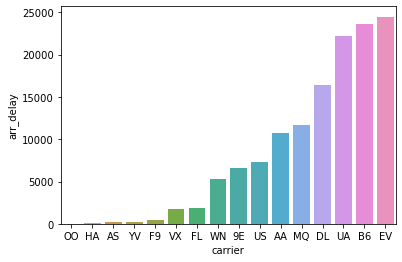

In [48]:
# sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

sns.barplot(x = "carrier", y ="arr_delay", data =delayed_arrivals.reset_index())

In [49]:
# View of the total amount of delayed departures
delayed_departures = df[df['dep_delay'] > 0]
delayed_departures = delayed_departures.groupby('carrier')['dep_delay'].count().sort_values()
print(delayed_departures)

carrier
OO        9
HA       69
AS      225
YV      232
F9      340
FL     1647
VX     2216
US     4762
WN     6535
9E     6980
MQ     7966
AA    10105
DL    15186
B6    21372
EV    22976
UA    27125
Name: dep_delay, dtype: int64


<AxesSubplot:xlabel='carrier', ylabel='dep_delay'>

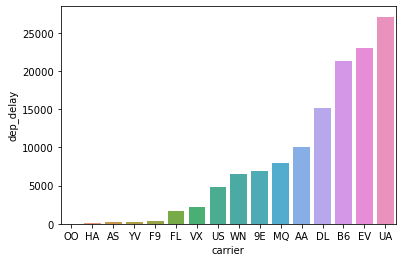

In [50]:
sns.barplot(x = "carrier", y = "dep_delay", data = delayed_departures.reset_index())

In [52]:
# View of the month with the most delayed departures
months_delayed_arrival_times = df[df['arr_delay'] > 0]
months_delayed_arrival_times = months_delayed_arrival_times.groupby('month')['arr_delay'].count().sort_values()
print(months_delayed_arrival_times)

month
9      6845
11     9639
10     9823
2     10100
5     10189
3     10919
1     11150
8     11629
6     12490
4     12522
7     13304
12    14394
Name: arr_delay, dtype: int64


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

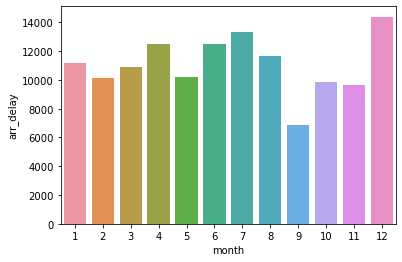

In [54]:
sns.barplot(x = "month", y = "arr_delay", data = months_delayed_arrival_times.reset_index())

In [64]:
# Trip i.e. origin-destination pair with most arrival delays
trip_with_most_arrival_delays = df.groupby(['origin', 'dest'])['arr_delay'].count().sort_values(ascending = True)
df_originDest = trip_with_most_arrival_delays.reset_index()
# get the delayed arrivals
df_originDest = df_originDest[df_originDest['arr_delay'] > 0]

df_originDest['start-end'] = df_originDest['origin'] +'->'+df_originDest['dest']
df_originDest.drop(['dest','origin'], axis = 1)
# print(df_originDest)

,arr_delay,start-end
0,1,JFK->MEM
1,1,JFK->STL
2,1,JFK->BHM
3,1,LGA->LEX
4,2,JFK->JAC
...,...,...
218,5961,LGA->CLT
219,8109,JFK->SFO
220,8507,LGA->ORD
221,10041,LGA->ATL


<AxesSubplot:xlabel='start-end', ylabel='arr_delay'>

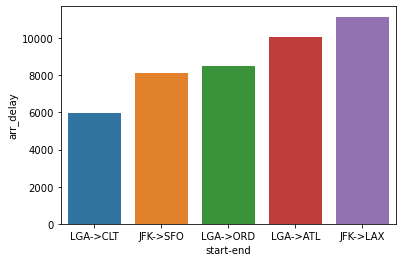

In [69]:
sns.barplot(x = "start-end", y = "arr_delay", data = df_originDest.tail(5))

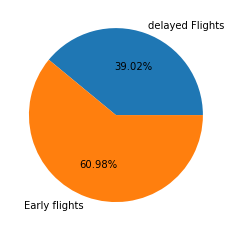

In [89]:
# percentage of delayed and early departures
delayed_flights = df[df['dep_delay']> 0]
df_df = delayed_flights.shape[0]
df_df
early_flights = df[df['dep_delay']<= 0]
df_ef = early_flights.shape[0]
labels = ['delayed Flights', 'Early flights']
plt.pie([df_df, df_ef], labels = labels,autopct='%1.2f%%')
plt.show()

In [104]:
# Task 3

dl_flights = df[df['carrier'] == 'DL'].head(15000)
ua_flights = df[df['carrier']== 'UA'].head(15000)
pop_data = pd.concat([dl_flights, ua_flights])

pop_data = pop_data[['carrier', 'arr_delay']]

pop_data.reset_index(inplace = True)
pop_data.drop('index', axis = 1)

,carrier,arr_delay
0,DL,-25.0
1,DL,-8.0
2,DL,-8.0
3,DL,-9.0
4,DL,-33.0
...,...,...
29995,UA,7.0
29996,UA,31.0
29997,UA,-28.0
29998,UA,-17.0


In [107]:
# Task 4

dl = pop_data[pop_data['carrier'] == 'DL'].sample(n=1000, random_state=5)
dl['sample_id'] = 1
ua = pop_data[pop_data['carrier'] == 'UA'].sample(n=1000, random_state=5)
ua['sample_id'] = 2
ua

,index,carrier,arr_delay,sample_id
25644,61579,UA,-5.0,2
28951,80211,UA,-18.0,2
23082,46976,UA,-12.0,2
25284,59608,UA,-9.0,2
28473,77458,UA,-19.0,2
...,...,...,...,...
25354,59983,UA,-21.0,2
25201,59165,UA,21.0,2
24740,56487,UA,13.0,2
16641,9477,UA,-23.0,2


In [108]:
# Task 5
samples = pd.concat([dl, ua])
samples

,index,carrier,arr_delay,sample_id
10644,76434,DL,-3.0,1
13951,100425,DL,-3.0,1
8082,58249,DL,-6.0,1
10284,73833,DL,-4.0,1
13473,96839,DL,51.0,1
...,...,...,...,...
25354,59983,UA,-21.0,2
25201,59165,UA,21.0,2
24740,56487,UA,13.0,2
16641,9477,UA,-23.0,2


In [164]:
# Task 6
mean = samples.groupby('carrier').mean().reset_index()
mean = mean.rename(columns = {"arr_delay": 'mean'}).drop(['index', 'sample_id'], axis = 1)

# I will use the sem method to get the standard error
standard_error = samples.groupby('carrier').sem().reset_index()
standard_error = standard_error.rename(columns = {"arr_delay": 'standard_error'}).drop(['index', 'sample_id'], axis = 1)

df = standard_error.merge(mean, left_on = "carrier", right_on = "carrier")
df

,carrier,standard_error,mean
0,DL,1.105799,-0.751
1,UA,0.899535,-0.883


In [185]:
# Task 7
import scipy.stats as st

dl_mean = df['mean'].iloc[0]
ua_mean = df['mean'].iloc[1]
ua_mean

dl_s_error = df['standard_error'].iloc[0]
ua_s_error = df['standard_error'].iloc[1]

# I'm using the scippy interval function 

# For Delta Airline
st.t.interval(alpha=0.95, df=1000, loc=dl_mean, scale=dl_s_error) 

# For United Airlines
st.t.interval(alpha=0.95, df=1000, loc=ua_mean, scale=ua_s_error) 

(-2.6481918749133326, 0.8821918749133328)

In [174]:
# Task 8
from scipy.stats import ttest_ind

cat1 = samples[samples.carrier =='UA']
cat2 = samples[samples.carrier =='DL']
cat2

# print(cat2.iloc[0]['arr_delay'])
stats = ttest_ind(cat1['arr_delay'], cat2['arr_delay'])
stats


Ttest_indResult(statistic=-0.09260127511770136, pvalue=0.9262296143898068)